In [60]:
import numpy as np
import pandas as pd
import pickle
#import matplotlib.pyplot as plt
#import seaborn as sns
import pathlib
import sys
import warnings
import imp

from os import walk, chdir, getcwd
from datetime import datetime
#from scipy.stats import iqr, wilcoxon, normaltest, sem, t
#from arch.bootstrap import IIDBootstrap
from mymodule import viz, metrics


#sns.set_style('dark')
warnings.filterwarnings('ignore')

In [61]:
# this is all drugcomb's data used to normalize by
with open('/tf/notebooks/code_for_pub/input_files/synergy_sens_averaged_by_blockID_replicates', 'rb') as f:
    metrics_df = pickle.load(f)

In [75]:
normalizer_dict = metrics.make_normalizer(metrics_df)

In [136]:

# testing bootstrap
val = [0.6419948276850342,
 0.6474037244893786,
 0.6345210885840264,
 0.641972630080717,
 0.6291225414293318,
 0.6398652529199027,
 0.6447215815688255,
 0.6359724325141045,
 0.6444897470665087,
 0.6336721495944178]



a1, a2 = metrics.mean_confidence_interval_normed(val, 
                                         metric='synergy_loewe', 
                                         norm='none',
                                         test_type='z',
                                         bootstrap_reps=1000,
                                         normalizer=normalizer_dict, 
                                         confidence=0.95)
print(a1,a2)


0.6394 0.007


In [62]:
imp.reload(viz)

<module 'mymodule.viz' from '/tf/notebooks/code_for_pub/mymodule/viz.py'>

### no reps with 40% valid


In [144]:
#working_dir = '/tf/notebooks/code_for_pub/_logs_as_python_files'

# change dir
#chdir(working_dir)

# list files
#files = next(walk(getcwd()))[2]
#files = [x for x in files if ('csv' not in x) & ('0.1' not in x)]

# get month when the files was created. We need the ones from december
#time_of_change = dict()
#for x in files:
#    mtime = pathlib.Path(x).stat()
#    time_of_change[x] = datetime.fromtimestamp(mtime.st_mtime).month
    
# pick those created in december & not hungabunga one
#files = sorted([x for x in time_of_change.keys() if \
#                #(time_of_change[x] == 12) &\
#                ('hunga' not in x)\
#                &('withreplicatesRFonly' not in x) &\
#                ('14models_' not in x) & \
#                ('Dec 15 20:46:24' not in x) &\
#                ('noreplicates' in x) &\
#                ('fps_transformer_1024bit_04_noreplicates_Wed Dec 16 07:58:05 2020.pickle' not in x) &\
#                ('fps_transformer_256bit_04_noreplicates_Tue Dec 15 16:04:14 2020.pickle' not in x) &\
#                ('fps_vae_16bit_04_noreplicates_Wed Dec 16 13:27:08 2020.pickle' not in x) &\
#                ('Transformer64_new_noreplicates_0.4_Sun Dec 27 16:30:31 2020.pickle' not in x) &\
#               ('fps_gae_64bit_04_noreplicates_Tue Dec 15 06:52:50 2020.pickle' not in x) &\
#                ('fps_gae_16bit_04_noreplicates_Wed Dec 16 10:38:43 2020.pickle' not in x) &\
#               ('fps_VAE_256bit_04_noreplicates_Mon Dec 14 12:12:01 2020.pickle' not in x)
#               ]) 

In [147]:
files = ['fps_e3fp_1024bit_04_noreplicates_Mon Dec 14 18:06:31 2020.pickle',
         'GAE48to64_new_noreplicates_0.4_Wed Dec 30 11_59_19 2020.pickle',
         'GAE64_new_noreplicates_0.4_Mon Dec 28 23:41:21 2020.pickle',
         'infomax_new_noreplicates_0.4_Thu Dec 31 09:33:31 2020.pickle',
         'fps_morgan_300bit_04_noreplicates_Wed Dec 16 19:37:12 2020.pickle',
         'fps_morgan_1024bit_04_noreplicates_Tue Dec 15 09:59:17 2020.pickle',
         'fps_topo_1024bit_04_CORRECTdtype_noreplicates_Sun Dec 20 00:53:09 2020.pickle',
         'Transformer64_04deduped_noreplicates_0.4_Mon Jan 11 03:55:45 2021.pickle',
         'Transformer1024_new_noreplicates_0.4_Mon Dec 28 06:53:13 2020.pickle',
         'VAE16_new_noreplicates_0.4_Tue Dec 29 10:40:36 2020.pickle',
         'VAE256_new_noreplicates_0.4_Wed Dec 30 04:45:20 2020.pickle'
        ]

names = ['E3FP', 'GAE_SVD', 'GAE', 'Infomax', 
         'Morgan_300', 'Morgan_1024', 'Topological_1024', 
         'Transformer_64', 'Transformer_1024', 'VAE_16', 'VAE_256']

In [148]:
# load 
full_log = dict()
for x, name in zip(files, names):
    filename = '/tf/notebooks/code_for_pub/_logs_as_python_files/' + x
    with open(filename, 'rb') as f:
        log_file = pickle.load(f)
        full_log[name] = log_file

In [149]:
full_log.keys()

dict_keys(['E3FP', 'GAE_SVD', 'GAE', 'Infomax', 'Morgan_300', 'Morgan_1024', 'Topological_1024', 'Transformer_64', 'Transformer_1024', 'VAE_16', 'VAE_256'])

In [206]:
length = ['1024',
          '16','64',
          '300',
          '300','1024',
          '1024',
          '64','1024',
          '16','256']

val_fraction = [0.4]*len(full_log.keys())

# 'GAE0to16','GAE16to32',
index = [['E3FP',
          'GAE_SVD','GAE', 
          'Infomax',
          'Morgan','Morgan', 
          'Topological',
          'Transformer', 'Transformer',
          'VAE','VAE'], \
         [1024,
          16,64,
          300,
          1024,300,
          1024,
          64,1024,
          16,256
         ],val_fraction]

#https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html

In [207]:
# z-transform
css_ci95, zip_ci95, loewe_ci95, bliss_ci95, hsa_ci95 = \
metrics.make_confidence_data(test_type='z',
                             log_file=full_log,
                             normalizer_dict=normalizer_dict)

holder_Z, holder_melt_Z = viz.make_plot_data(c=css_ci95,
                                                 z=zip_ci95,
                                                 l=loewe_ci95,
                                                 b=bliss_ci95,
                                                 h=hsa_ci95,
                                                 index=index)

In [208]:
# symmetrical bootstrap
css_ci95, zip_ci95, loewe_ci95, bliss_ci95, hsa_ci95 = \
metrics.make_confidence_data(test_type='own',
                             log_file=full_log,
                             bootstrap_reps=1000,
                             normalizer_dict=normalizer_dict)

holder_Sym, holder_melt_Sym = viz.make_plot_data(c=css_ci95,
                                                 z=zip_ci95,
                                                 l=loewe_ci95,
                                                 b=bliss_ci95,
                                                 h=hsa_ci95,
                                                 index=index)

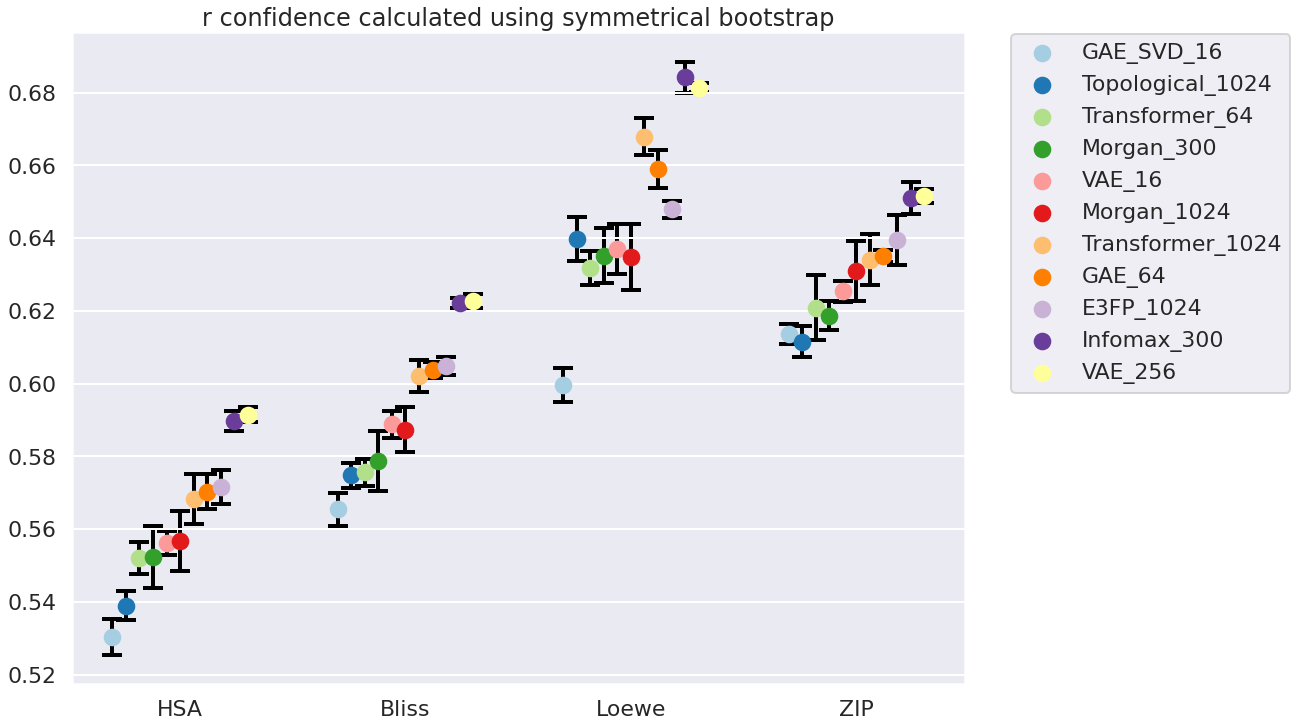

In [209]:
viz.space_invaders(name_plot='r',
                   ci='symmetrical bootstrap',
                   holder_melt=holder_melt_Sym,
                   include_css=False)\
.show()

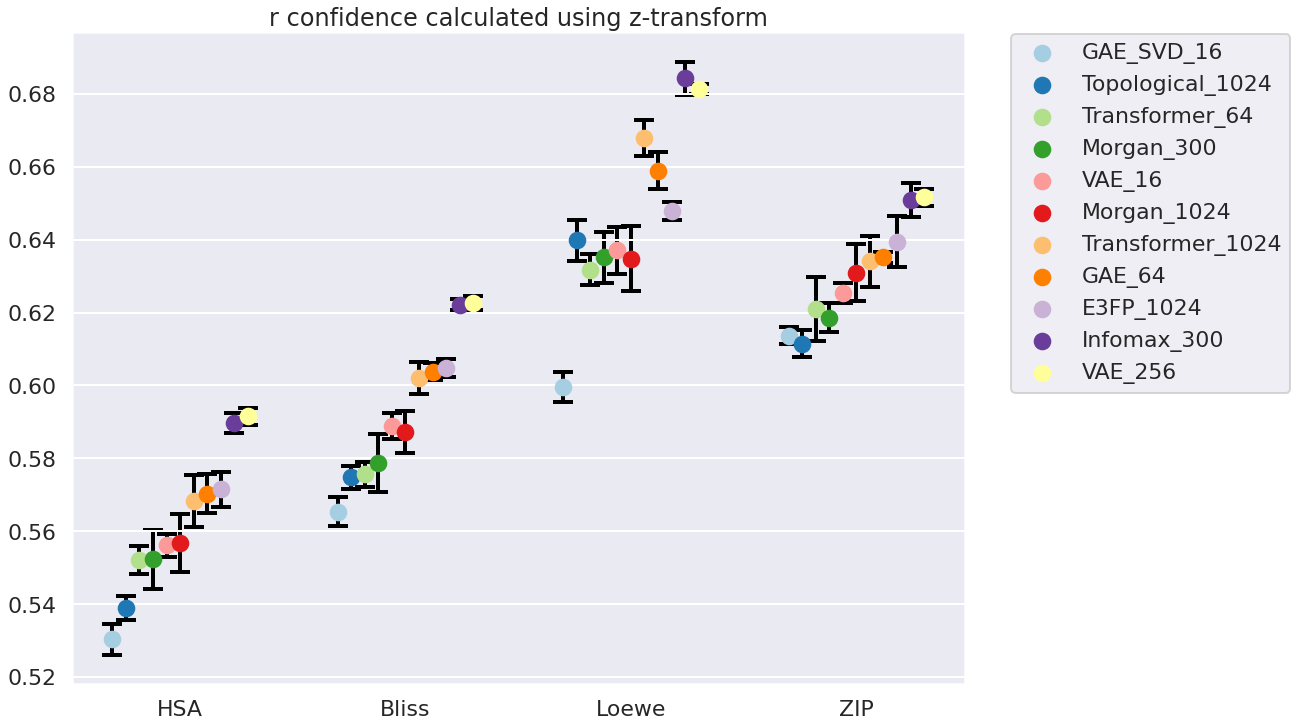

In [210]:
viz.space_invaders(name_plot='r',
                   ci='z-transform',
                   holder_melt=holder_melt_Z,
                   include_css=False)\
.show()

In [261]:
viz.colors(name='r',holder = holder_Z) # no_norm's CI do not work

In [262]:
print(viz.colors(name='r',holder = holder_Z).data.to_latex(index=True,
                                                           multicolumn=True ,
                                                           bold_rows=True,
                                                           multirow=True,
                                                           longtable=False))

\begin{tabular}{lllrrrrrrrrrr}
\toprule
     &     &     & \multicolumn{2}{l}{CSS\_RI} & \multicolumn{2}{l}{Synergy ZIP} & \multicolumn{2}{l}{Synergy Loewe} & \multicolumn{2}{l}{Synergy Bliss} & \multicolumn{2}{l}{Synergy HSA} \\
     &     &     & \multicolumn{2}{l}{r} & \multicolumn{2}{l}{r} & \multicolumn{2}{l}{r} & \multicolumn{2}{l}{r} & \multicolumn{2}{l}{r} \\
\midrule
\textbf{E3FP} & \textbf{1024} & \textbf{0.4} &  0.8641 &  0.0017 &      0.6394 &  0.0070 &        0.6479 &  0.0016 &        0.6048 &  0.0080 &      0.5716 &  0.0033 \\
\textbf{GAE\_SVD} & \textbf{16} & \textbf{0.4} &  0.8540 &  0.0032 &      0.6137 &  0.0089 &        0.5996 &  0.0036 &        0.5654 &  0.0057 &      0.5304 &  0.0042 \\
\textbf{GAE} & \textbf{64} & \textbf{0.4} &  0.8667 &  0.0028 &      0.6351 &  0.0048 &        0.6589 &  0.0023 &        0.6038 &  0.0028 &      0.5703 &  0.0039 \\
\textbf{Infomax} & \textbf{300} & \textbf{0.4} &  0.8761 &  0.0019 &      0.6509 &  0.0046 &        0.6842 &  0.0024 &

In [264]:
viz.colors(name='sd',holder = holder_Sym) # no_norm's CI do not work

In [263]:
print(viz.colors(name='sd',holder = holder_Sym).data.to_latex(index=True,
                                                           multicolumn=True ,
                                                           bold_rows=True,
                                                           multirow=True,
                                                           longtable=False))

\begin{tabular}{lllrrrrrrrrrr}
\toprule
     &     &     & \multicolumn{2}{l}{CSS\_RI} & \multicolumn{2}{l}{Synergy ZIP} & \multicolumn{2}{l}{Synergy Loewe} & \multicolumn{2}{l}{Synergy Bliss} & \multicolumn{2}{l}{Synergy HSA} \\
     &     &     & \multicolumn{2}{l}{sd} & \multicolumn{2}{l}{sd} & \multicolumn{2}{l}{sd} & \multicolumn{2}{l}{sd} & \multicolumn{2}{l}{sd} \\
\midrule
\textbf{E3FP} & \textbf{1024} & \textbf{0.4} &  0.5034 &  0.0011 &      0.7715 &  0.0090 &        0.7624 &  0.0029 &        0.7987 &  0.0063 &      0.8214 &  0.0051 \\
\textbf{GAE\_SVD} & \textbf{16} & \textbf{0.4} &  0.5205 &  0.0020 &      0.7926 &  0.0119 &        0.8004 &  0.0046 &        0.8277 &  0.0079 &      0.8487 &  0.0036 \\
\textbf{GAE} & \textbf{64} & \textbf{0.4} &  0.4990 &  0.0016 &      0.7750 &  0.0098 &        0.7524 &  0.0035 &        0.7996 &  0.0072 &      0.8220 &  0.0045 \\
\textbf{Infomax} & \textbf{300} & \textbf{0.4} &  0.4822 &  0.0011 &      0.7616 &  0.0079 &        0.7285 &  0.0

In [255]:
working_dir = '/tf/notebooks/code_for_pub/FIGURES/'
chdir(working_dir)

for i in ['r']:
    viz.colors(name=f'{i}',holder = holder_Z).data.to_csv(f'prediction_04_deduped_{i}_z.csv') # no_norm's CI do not work
    
    

In [256]:
working_dir = '/tf/notebooks/code_for_pub/FIGURES/'
chdir(working_dir)

for i in ['r','sd']:
    viz.colors(name=f'{i}',holder = holder_Sym).data.to_csv(f'prediction_04_deduped_{i}_sym.csv') # no_norm's CI do not work


### with reps with 40% valid


In [161]:
#working_dir = '/tf/notebooks/code_for_pub/_logs_as_python_files'

# change dir
#chdir(working_dir)

# list files
#files = next(walk(getcwd()))[2]
#files = [x for x in files if ('csv' not in x) & ('0.1' not in x)]

# get month when the files was created. We need the ones from december
#time_of_change = dict()
#for x in files:
#    mtime = pathlib.Path(x).stat()
#    time_of_change[x] = datetime.fromtimestamp(mtime.st_mtime).month
    
# pick those created in december & not hungabunga one
#files = sorted([x for x in time_of_change.keys() if \
#                #(time_of_change[x] == 12) &\
#                ('hunga' not in x)\
#                &('withreplicatesRFonly' not in x) &\
#                ('14models_' not in x) & \
#                ('Dec 15 20:46:24' not in x) &\
#                ('noreplicates' in x) &\
#                ('fps_transformer_1024bit_04_noreplicates_Wed Dec 16 07:58:05 2020.pickle' not in x) &\
#                ('fps_transformer_256bit_04_noreplicates_Tue Dec 15 16:04:14 2020.pickle' not in x) &\
#                ('fps_vae_16bit_04_noreplicates_Wed Dec 16 13:27:08 2020.pickle' not in x) &\
#                ('Transformer64_new_noreplicates_0.4_Sun Dec 27 16:30:31 2020.pickle' not in x) &\
#                ('fps_gae_64bit_04_noreplicates_Tue Dec 15 06:52:50 2020.pickle' not in x) &\
#                ('fps_gae_16bit_04_noreplicates_Wed Dec 16 10:38:43 2020.pickle' not in x) &\
#                ('fps_VAE_256bit_04_noreplicates_Mon Dec 14 12:12:01 2020.pickle' not in x)
#               ]) 

In [162]:
#[x for x in sorted(files) if 'vae' in x.lower()] 

In [163]:
files = ['fps_e3fp_1024bit_0.4valid.pickle',
         'fps_gae_16bit_SVD_0.4valid.pickle',
         'fps_gae_64bit_0.4valid.pickle',
         'fps_infomax_300bit_0.4valid.pickle',
         'fps_morgan_300bit_0.4valid.pickle',
         'fps_morgan_1024bit_0.4valid.pickle',
         'fps_topological_1024bit_0.4valid.pickle',
         'Transformer64_04duped_noreplicates_0.4_Mon Jan 11 09:39:57 2021.pickle',
         'fps_transformer_1024bit_0.4valid.pickle',
         'fps_vae_16bit_0.4valid.pickle',
         'fps_vae_256bit_0.4valid.pickle'
         ]

names = ['E3FP', 'GAE_SVD', 'GAE', 'Infomax', 
         'Morgan_300', 'Morgan_1024', 'Topological_1024', 
         'Transformer_64', 'Transformer_1024', 'VAE_16', 'VAE_256']

In [164]:
# load 
full_log_dups = dict()
for x,name in zip(files, names):
    filename = '/tf/notebooks/code_for_pub/_logs_as_python_files/' + x
    with open(filename, 'rb') as f:
        log_file = pickle.load(f)
        full_log_dups[name] = log_file


In [165]:
full_log_dups.keys()

dict_keys(['E3FP', 'GAE_SVD', 'GAE', 'Infomax', 'Morgan_300', 'Morgan_1024', 'Topological_1024', 'Transformer_64', 'Transformer_1024', 'VAE_16', 'VAE_256'])

In [166]:
length = ['1024',
          '16','64',
          '300',
          '300','1024',
          '1024',
          '64','1024',
          '16','256']

val_fraction = [0.4]*len(full_log_dups.keys())

# 'GAE0to16','GAE16to32',
index = [['E3FP',
          'GAE_SVD','GAE', 
          'Infomax',
          'Morgan','Morgan', 
          'Topological',
          'Transformer', 'Transformer',
          'VAE','VAE'], \
         [1024,
          16,64,
          300,
          300,1024,
          1024,
          64,1024,
          16,256
         ],val_fraction]

#https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html

In [168]:
# z-transform
css_ci95, zip_ci95, loewe_ci95, bliss_ci95, hsa_ci95 = \
metrics.make_confidence_data(test_type='z',
                             log_file=full_log_dups,
                             normalizer_dict=normalizer_dict)

holder_Z_duped, holder_melt_Z_duped = viz.make_plot_data(c=css_ci95,
                                                 z=zip_ci95,
                                                 l=loewe_ci95,
                                                 b=bliss_ci95,
                                                 h=hsa_ci95,
                                                 index=index)

In [169]:
# symmetrical bootstrap
css_ci95, zip_ci95, loewe_ci95, bliss_ci95, hsa_ci95 = \
metrics.make_confidence_data(test_type='own',
                             log_file=full_log_dups,
                             bootstrap_reps=1000,
                             normalizer_dict=normalizer_dict)

holder_Sym_duped, holder_melt_Sym_duped = viz.make_plot_data(c=css_ci95,
                                                 z=zip_ci95,
                                                 l=loewe_ci95,
                                                 b=bliss_ci95,
                                                 h=hsa_ci95,
                                                 index=index)

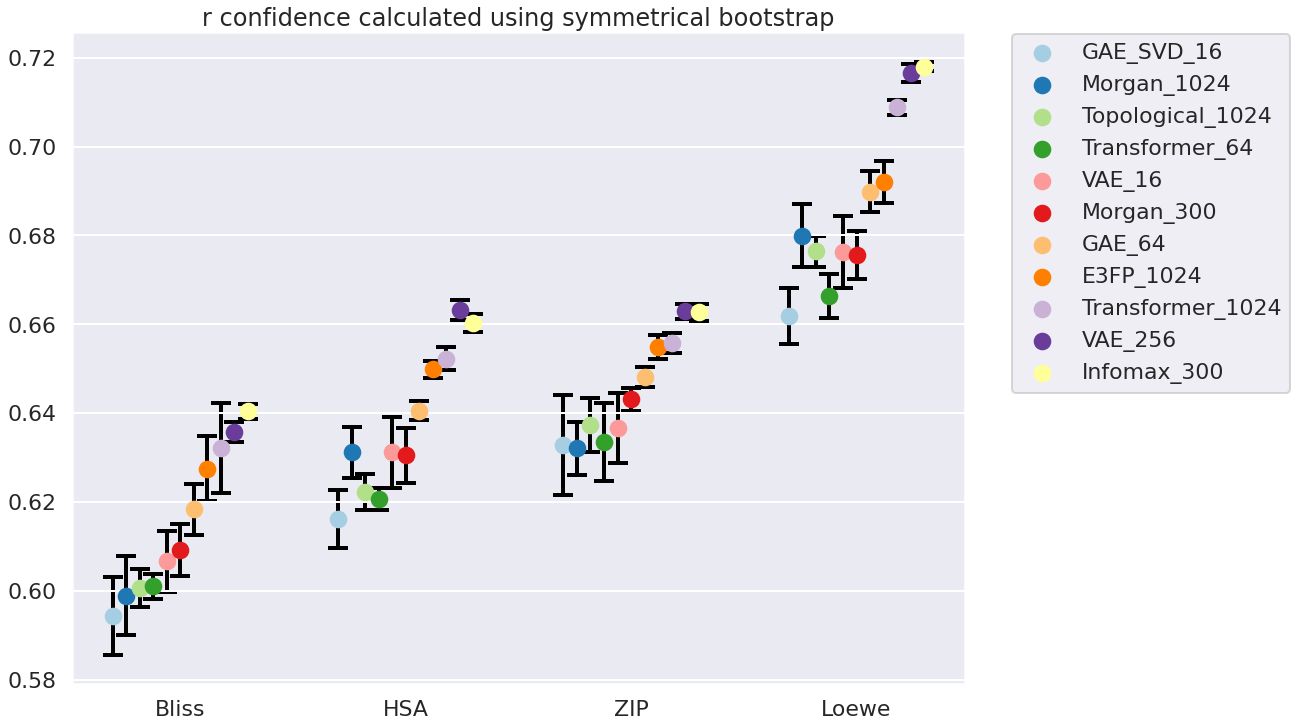

In [170]:
viz.space_invaders(name_plot='r',
                   ci='symmetrical bootstrap',
                   holder_melt=holder_melt_Sym_duped,
                   include_css=False)\
.show()

In [239]:
viz.colors(name='r',holder = holder_Sym_duped) # no_norm's CI do not work

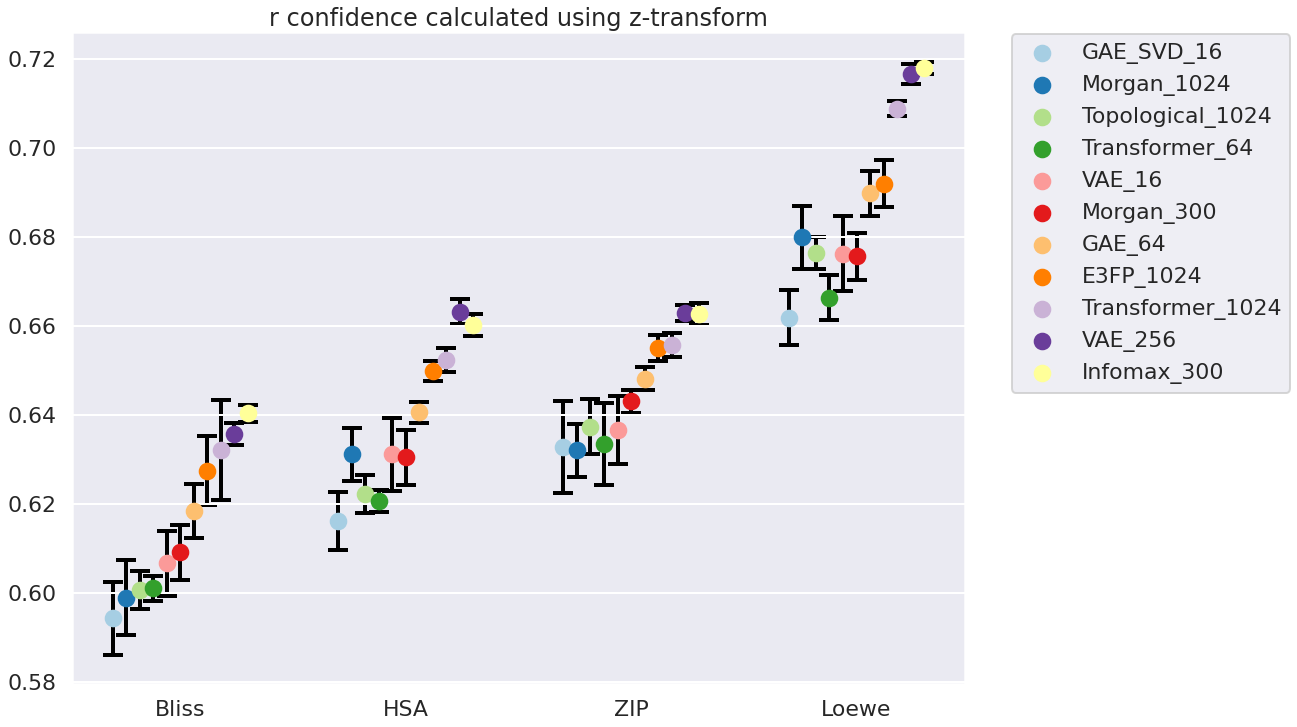

In [178]:
viz.space_invaders(name_plot='r',
                   ci='z-transform',
                   holder_melt=holder_melt_Z_duped,
                   include_css=False)\
.show()

In [266]:
viz.colors(name='r',holder = holder_Z_duped) # no_norm's CI do not work

In [267]:
print(viz.colors(name='sd',holder = holder_Sym_duped).data.to_latex(index=True,
                                                           multicolumn=True ,
                                                           bold_rows=True,
                                                           multirow=True,
                                                           longtable=False))

\begin{tabular}{lllrrrrrrrrrr}
\toprule
     &     &     & \multicolumn{2}{l}{CSS\_RI} & \multicolumn{2}{l}{Synergy ZIP} & \multicolumn{2}{l}{Synergy Loewe} & \multicolumn{2}{l}{Synergy Bliss} & \multicolumn{2}{l}{Synergy HSA} \\
     &     &     & \multicolumn{2}{l}{sd} & \multicolumn{2}{l}{sd} & \multicolumn{2}{l}{sd} & \multicolumn{2}{l}{sd} & \multicolumn{2}{l}{sd} \\
\midrule
\textbf{E3FP} & \textbf{1024} & \textbf{0.4} &  0.4925 &  0.0014 &      0.7847 &  0.0076 &        0.7553 &  0.0028 &        0.8219 &  0.0067 &      0.8576 &  0.0023 \\
\textbf{GAE\_SVD} & \textbf{16} & \textbf{0.4} &  0.5070 &  0.0015 &      0.8041 &  0.0078 &        0.7836 &  0.0033 &        0.8489 &  0.0073 &      0.8886 &  0.0053 \\
\textbf{GAE} & \textbf{64} & \textbf{0.4} &  0.4962 &  0.0014 &      0.7904 &  0.0053 &        0.7568 &  0.0033 &        0.8295 &  0.0094 &      0.8660 &  0.0028 \\
\textbf{Infomax} & \textbf{300} & \textbf{0.4} &  0.4748 &  0.0011 &      0.7776 &  0.0073 &        0.7269 &  0.0

In [257]:
working_dir = '/tf/notebooks/code_for_pub/FIGURES/'
chdir(working_dir)

for i in ['r']:
    viz.colors(name=f'{i}',holder = holder_Z_duped).data.to_csv(f'prediction_04_duped_{i}_z.csv') # no_norm's CI do not work
    
    

In [258]:
working_dir = '/tf/notebooks/code_for_pub/FIGURES/'
chdir(working_dir)

for i in ['r','sd']:
    viz.colors(name=f'{i}',holder = holder_Sym_duped).data.to_csv(f'prediction_04_duped_{i}_sym.csv') # no_norm's CI do not work
    
    

### no reps with 10% valid


In [126]:
working_dir = '/tf/notebooks/code_for_pub/_logs_as_python_files'

# change dir
chdir(working_dir)

# list files
files = next(walk(getcwd()))[2]
files = [x for x in files if ('csv' not in x) & ('0.4' not in x) & ('04' not in x) & ('compare' not in x) & ('_replicates' not in x)]
files = sorted(files)

# get month when the files was created. We need the ones from december
#time_of_change = dict()
#for x in files:
#    mtime = pathlib.Path(x).stat()
#    time_of_change[x] = datetime.fromtimestamp(mtime.st_mtime).month
    
# pick those created in december & not hungabunga one
#files = sorted([x for x in time_of_change.keys() if \
#                #(time_of_change[x] == 12) &\
#                ('hunga' not in x)\
#                &('withreplicatesRFonly' not in x) &\
#                ('14models_' not in x) & \
#                ('Dec 15 20:46:24' not in x) &\
#                ('noreplicates' in x) &\
#                ('fps_transformer_1024bit_04_noreplicates_Wed Dec 16 07:58:05 2020.pickle' not in x) &\
#                ('fps_transformer_256bit_04_noreplicates_Tue Dec 15 16:04:14 2020.pickle' not in x) &\
#                ('fps_vae_16bit_04_noreplicates_Wed Dec 16 13:27:08 2020.pickle' not in x) &\
#                ('Transformer64_new_noreplicates_0.4_Sun Dec 27 16:30:31 2020.pickle' not in x) &\
#                ('fps_gae_64bit_04_noreplicates_Tue Dec 15 06:52:50 2020.pickle' not in x) &\
#                ('fps_gae_16bit_04_noreplicates_Wed Dec 16 10:38:43 2020.pickle' not in x) &\
#                ('fps_VAE_256bit_04_noreplicates_Mon Dec 14 12:12:01 2020.pickle' not in x)
#               ]) 

In [193]:
files = ['E3FP1024_new_noreplicates_0.1_Tue Jan 12 04:46:43 2021.pickle',
         'GAESVD16_new_noreplicates_0.1_Mon Jan 11 00:25:26 2021.pickle',
         'GAE64_new_noreplicates_0.1_Tue Dec 29 03:44:51 2020.pickle',
         'Infomax300_new_noreplicates_0.1_Tue Jan 12 00:31:49 2021.pickle',
         'Morgan300_new_noreplicates_0.1_Mon Jan 11 12:22:08 2021.pickle',
         'Morgan1024_new_noreplicates_0.1_Mon Jan 11 15:24:36 2021.pickle',
         'Topo1024_new_noreplicates_0.1_Mon Jan 11 18:53:45 2021.pickle',
         'Transformer64_new_noreplicates_0.1_Wed Dec 30 21:37:35 2020.pickle',
         'Transformer1024_new_noreplicates_0.1_Wed Dec 30 09_51_49 2020.pickle',
         'VAE16_new_noreplicates_0.1_Tue Dec 29 14:26:34 2020.pickle',
         'VAE256_new_noreplicates_0.1_Wed Dec 30 09:53:42 2020.pickle',
        ]

names = ['E3FP', 'GAE_SVD', 'GAE', 'Infomax', 
         'Morgan_300', 'Morgan_1024', 'Topological_1024', 
         'Transformer_64', 'Transformer_1024', 'VAE_16', 'VAE_256']

In [194]:
# load 
full_log_01valid = dict()
for x,name in zip(files,names):
    filename = '/tf/notebooks/code_for_pub/_logs_as_python_files/' + x
    with open(filename, 'rb') as f:
        log_file = pickle.load(f)
        full_log_01valid[name] = log_file

In [195]:
full_log_01valid.keys()

dict_keys(['E3FP', 'GAE_SVD', 'GAE', 'Infomax', 'Morgan_300', 'Morgan_1024', 'Topological_1024', 'Transformer_64', 'Transformer_1024', 'VAE_16', 'VAE_256'])

In [213]:
length = ['1024',
          '16','64',
          '300',
          '300','1024',
          '1024',
          '64','1024',
          '16','256']

val_fraction = [0.1]*len(full_log_01valid.keys())

# 'GAE0to16','GAE16to32',
index = [['E3FP',
          'GAE_SVD','GAE', 
          'Infomax',
          'Morgan','Morgan', 
          'Topological',
          'Transformer', 'Transformer',
          'VAE','VAE'], \
         [1024,
          16,64,
          300,
          300,1024,
          1024,
          64,1024,
          16,256
         ],val_fraction]

#https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html

In [214]:
# z-transform
css_ci95, zip_ci95, loewe_ci95, bliss_ci95, hsa_ci95 = \
metrics.make_confidence_data(test_type='z',
                             log_file=full_log_01valid,
                             normalizer_dict=normalizer_dict)

holder_Z_01, holder_melt_Z_01 = viz.make_plot_data(c=css_ci95,
                                                 z=zip_ci95,
                                                 l=loewe_ci95,
                                                 b=bliss_ci95,
                                                 h=hsa_ci95,
                                                 index=index)

In [215]:
# symmetrical bootstrap
css_ci95, zip_ci95, loewe_ci95, bliss_ci95, hsa_ci95 = \
metrics.make_confidence_data(test_type='own',
                             log_file=full_log_01valid,
                             bootstrap_reps=1000,
                             normalizer_dict=normalizer_dict)

holder_Sym_01, holder_melt_Sym_01 = viz.make_plot_data(c=css_ci95,
                                                 z=zip_ci95,
                                                 l=loewe_ci95,
                                                 b=bliss_ci95,
                                                 h=hsa_ci95,
                                                 index=index)

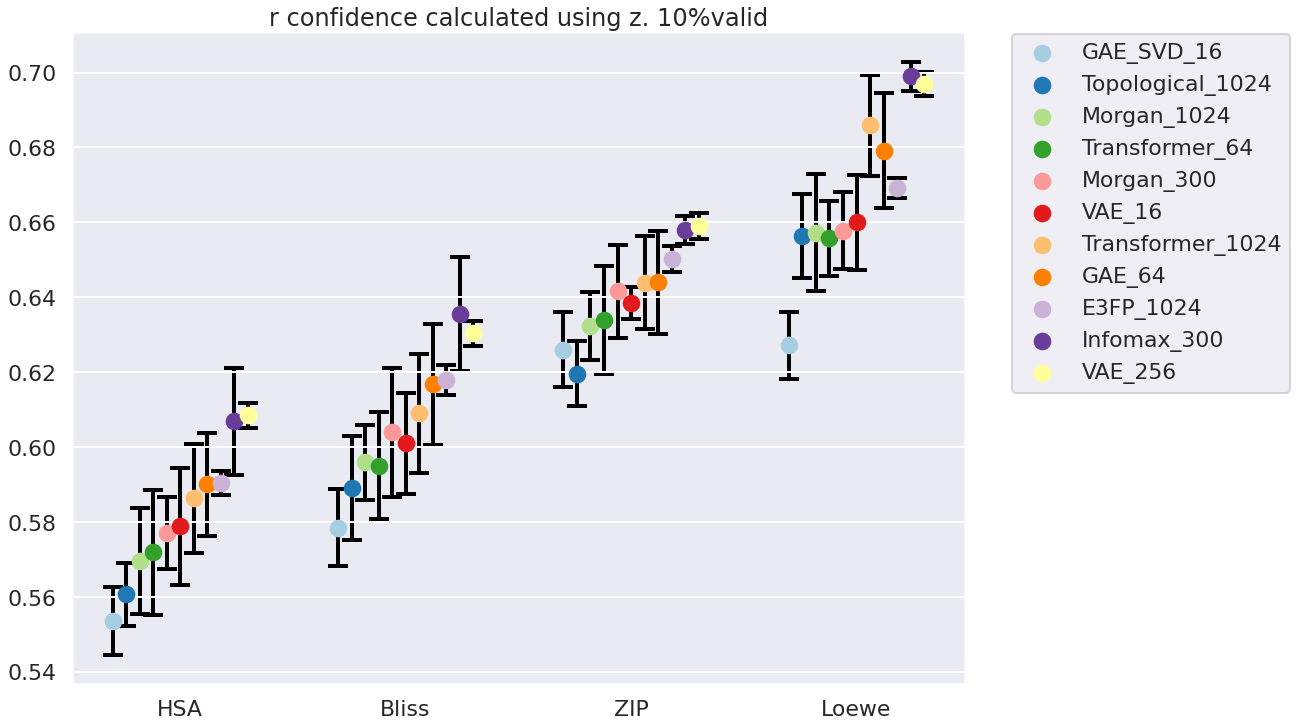

In [217]:
viz.space_invaders(name_plot='r',
                   ci='z. 10%valid',
                   holder_melt=holder_melt_Z_01,
                   include_css=False)\
.show()

In [241]:
viz.colors(name='r', holder = holder_Z_01) # no_norm's CI do not work

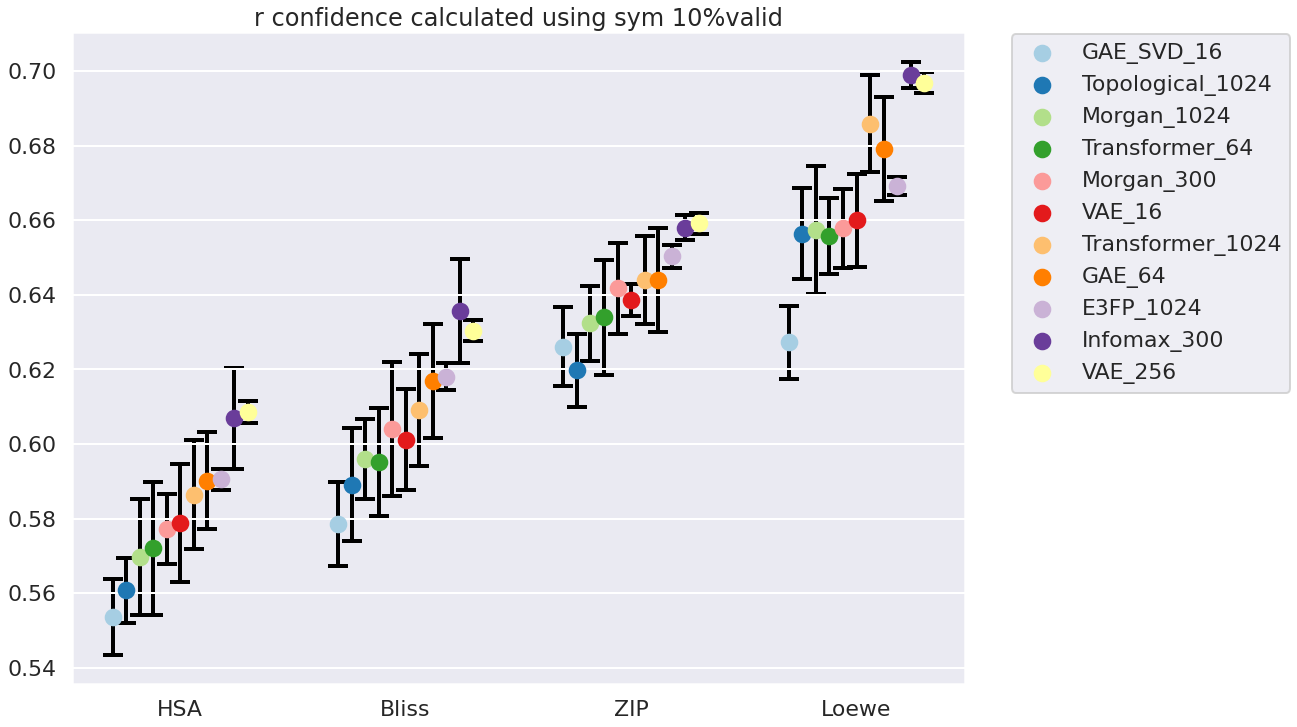

In [219]:
viz.space_invaders(name_plot='r',
                   ci='sym 10%valid',
                   holder_melt=holder_melt_Sym_01,
                   include_css=False)\
.show()

In [273]:
viz.colors(name='sd', holder = holder_Sym_01) # no_norm's CI do not work

In [272]:

print(viz.colors(name='sd',holder = holder_Sym_01).data.to_latex(index=True,
                                                           multicolumn=True ,
                                                           bold_rows=True,
                                                           multirow=True,
                                                           longtable=False))

\begin{tabular}{lllrrrrrrrrrr}
\toprule
     &     &     & \multicolumn{2}{l}{CSS\_RI} & \multicolumn{2}{l}{Synergy ZIP} & \multicolumn{2}{l}{Synergy Loewe} & \multicolumn{2}{l}{Synergy Bliss} & \multicolumn{2}{l}{Synergy HSA} \\
     &     &     & \multicolumn{2}{l}{sd} & \multicolumn{2}{l}{sd} & \multicolumn{2}{l}{sd} & \multicolumn{2}{l}{sd} & \multicolumn{2}{l}{sd} \\
\midrule
\textbf{E3FP} & \textbf{1024} & \textbf{0.1} &  0.4881 &  0.0033 &      0.7638 &  0.0162 &        0.7430 &  0.0080 &        0.7906 &  0.0148 &      0.8089 &  0.0131 \\
\textbf{GAE\_SVD} & \textbf{16} & \textbf{0.1} &  0.5041 &  0.0041 &      0.7845 &  0.0154 &        0.7788 &  0.0098 &        0.8203 &  0.0150 &      0.8351 &  0.0137 \\
\textbf{GAE} & \textbf{64} & \textbf{0.1} &  0.4842 &  0.0037 &      0.7694 &  0.0193 &        0.7337 &  0.0084 &        0.7914 &  0.0182 &      0.8090 &  0.0136 \\
\textbf{Infomax} & \textbf{300} & \textbf{0.1} &  0.4708 &  0.0038 &      0.7574 &  0.0182 &        0.7136 &  0.0

In [259]:
working_dir = '/tf/notebooks/code_for_pub/FIGURES/'
chdir(working_dir)

for i in ['r','sd']:
    viz.colors(name=f'{i}',holder = holder_Sym_01).data.to_csv(f'prediction_01_deduped_{i}_sym.csv') # no_norm's CI do not work
    
for i in ['r']:
    viz.colors(name=f'{i}',holder = holder_Z_01).data.to_csv(f'prediction_01_deduped_{i}_z.csv') # no_norm's CI do not work
    

### with reps with 10% valid

In [227]:
files = ['E3FP1024_new_replicates_0.1_Tue Jan 12 00_31_16 2021.pickle',
         'GAESVD16_new_replicates_0.1_Mon Jan 11 00_58_25 2021.pickle',
         'GAE64_new_replicates_0.1_Mon Jan 11 04_29_52 2021.pickle',
         'Infomax300_new_replicates_0.1_Mon Jan 11 19_54_07 2021.pickle',
         'Morgan300_new_replicates_0.1_Mon Jan 11 07_20_29 2021.pickle',
         'Morgan1024_new_replicates_0.1_Mon Jan 11 10_29_33 2021.pickle',
         'Topo1024_new_replicates_0.1_Mon Jan 11 14_14_53 2021.pickle',
         'Transformer64_new_replicates_0.1_Tue Jan 12 03_58_33 2021.pickle',
         'Transformer1024_new_replicates_0.1_Tue Jan 12 14_50_10 2021.pickle',
         'vae16_new_replicates_0.1_Tue Jan 12 17_49_31 2021.pickle',
         'vae256_new_replicates_0.1_Tue Jan 12 23_04_29 2021.pickle',
        ]

names = ['E3FP', 'GAE_SVD', 'GAE', 'Infomax', 
         'Morgan_300', 'Morgan_1024', 'Topological_1024', 
         'Transformer_64', 'Transformer_1024', 'VAE_16', 'VAE_256']

In [230]:
# load 
full_log_01_duped = dict()
for x,name in zip(files,names):
    filename = '/tf/notebooks/code_for_pub/_logs_as_python_files/' + x
    with open(filename, 'rb') as f:
        log_file = pickle.load(f)
        full_log_01_duped[name] = log_file

In [231]:
full_log_01_duped.keys()

dict_keys(['E3FP', 'GAE_SVD', 'GAE', 'Infomax', 'Morgan_300', 'Morgan_1024', 'Topological_1024', 'Transformer_64', 'Transformer_1024', 'VAE_16', 'VAE_256'])

In [232]:
length = ['1024',
          '16','64',
          '300',
          '300','1024',
          '1024',
          '64','1024',
          '16','256']

val_fraction = [0.1]*len(full_log_01_duped.keys())

# 'GAE0to16','GAE16to32',
index = [['E3FP',
          'GAE_SVD','GAE', 
          'Infomax',
          'Morgan','Morgan', 
          'Topological',
          'Transformer', 'Transformer',
          'VAE','VAE'], \
         [1024,
          16,64,
          300,
          300,1024,
          1024,
          64,1024,
          16,256
         ],val_fraction]

#https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html

In [233]:
# z-transform
css_ci95, zip_ci95, loewe_ci95, bliss_ci95, hsa_ci95 = \
metrics.make_confidence_data(test_type='z',
                             log_file=full_log_01_duped,
                             normalizer_dict=normalizer_dict)

holder_Z_01_duped, holder_melt_Z_01_duped = viz.make_plot_data(c=css_ci95,
                                                 z=zip_ci95,
                                                 l=loewe_ci95,
                                                 b=bliss_ci95,
                                                 h=hsa_ci95,
                                                 index=index)

In [234]:
# symmetrical bootstrap
css_ci95, zip_ci95, loewe_ci95, bliss_ci95, hsa_ci95 = \
metrics.make_confidence_data(test_type='own',
                             log_file=full_log_01_duped,
                             bootstrap_reps=1000,
                             normalizer_dict=normalizer_dict)

holder_Sym_01_duped, holder_melt_Sym_01_duped = viz.make_plot_data(c=css_ci95,
                                                 z=zip_ci95,
                                                 l=loewe_ci95,
                                                 b=bliss_ci95,
                                                 h=hsa_ci95,
                                                 index=index)

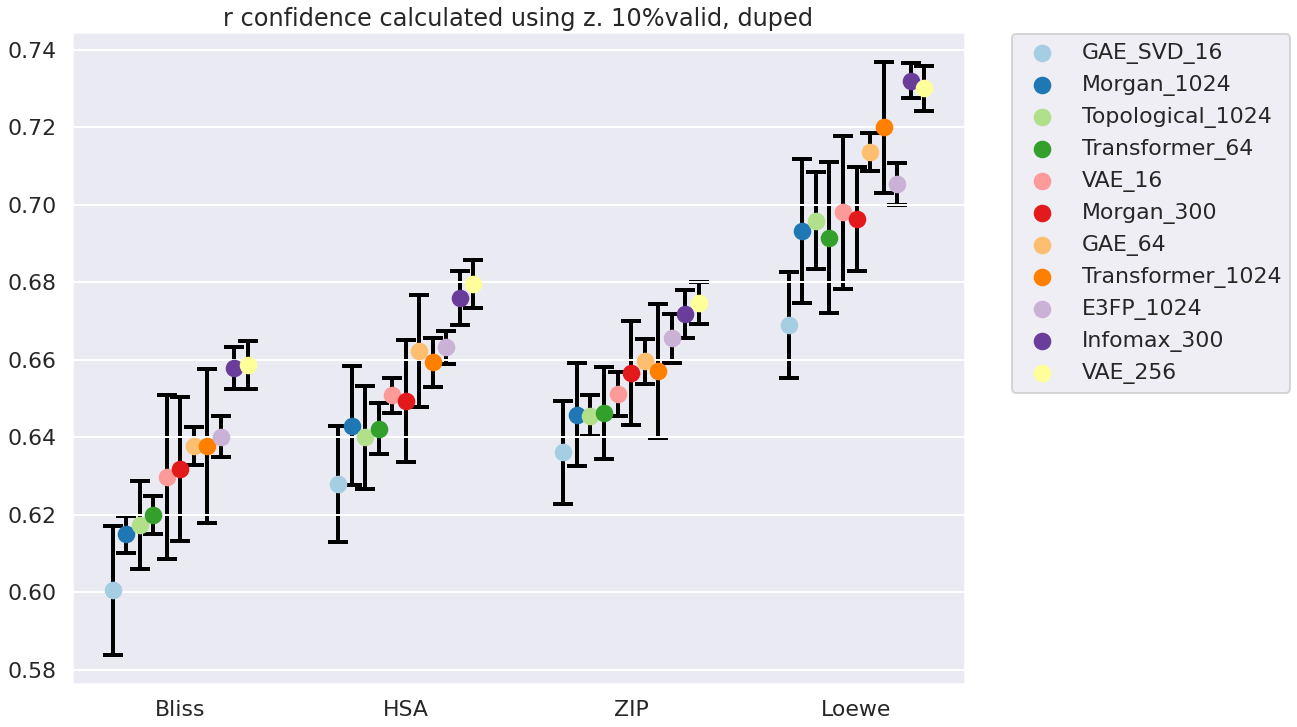

In [235]:
viz.space_invaders(name_plot='r',
                   ci='z. 10%valid, duped',
                   holder_melt=holder_melt_Z_01_duped,
                   include_css=False)\
.show()

In [243]:
viz.colors(name='r', holder = holder_Z_01_duped) # no_norm's CI do not work

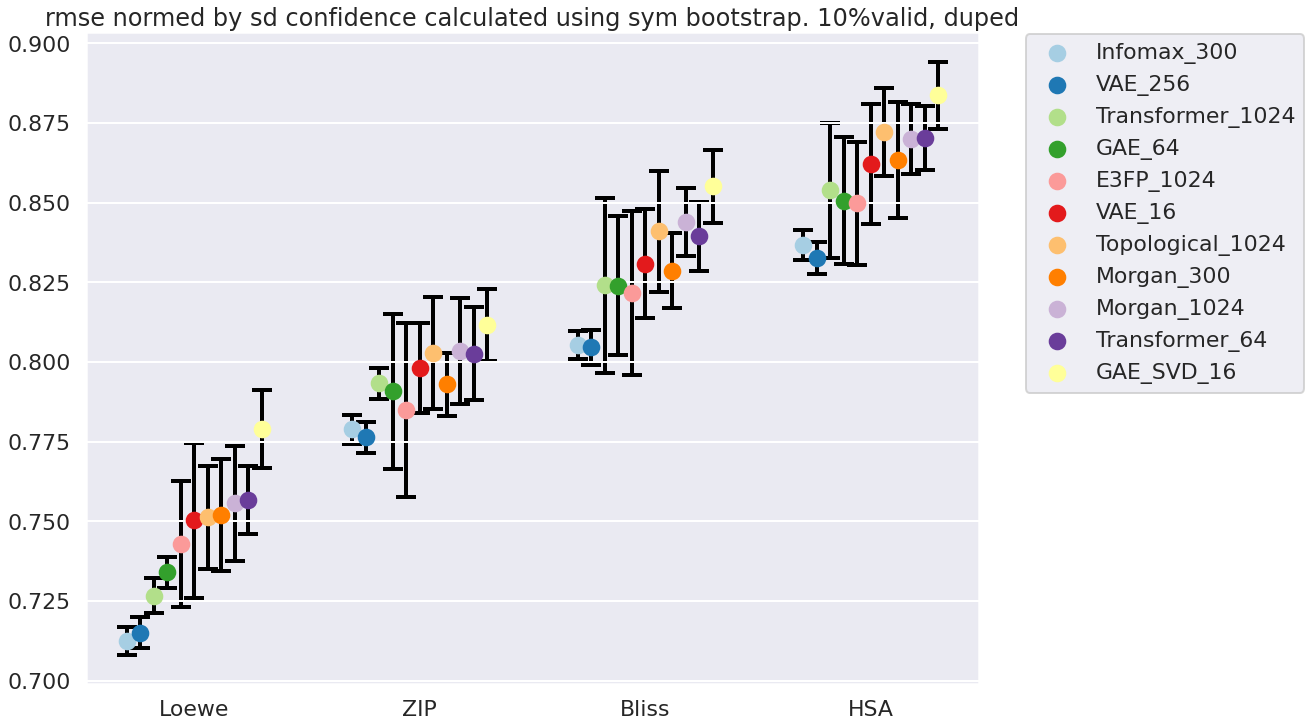

In [246]:
viz.space_invaders(name_plot='sd',
                   ci='sym bootstrap. 10%valid, duped',
                   holder_melt=holder_melt_Sym_01_duped,
                   include_css=False)\
.show()

In [244]:
viz.colors(name='r', holder = holder_Sym_01_duped) # no_norm's CI do not work

In [260]:
working_dir = '/tf/notebooks/code_for_pub/FIGURES/'
chdir(working_dir)

for i in ['r','sd']:
    viz.colors(name=f'{i}',holder = holder_Sym_01_duped).data.to_csv(f'prediction_01_duped_{i}_sym.csv') # no_norm's CI do not work
    
for i in ['r']:
    viz.colors(name=f'{i}',holder = holder_Z_01_duped).data.to_csv(f'prediction_01_duped_{i}_z.csv') # no_norm's CI do not work
    

In [278]:
viz.colors(name='sd', holder = holder_Sym_01_duped) # no_norm's CI do not work


In [277]:
print(viz.colors(name='sd',holder = holder_Sym_01_duped).data.to_latex(index=True,
                                                           multicolumn=True ,
                                                           bold_rows=True,
                                                           multirow=True,
                                                           longtable=False))

\begin{tabular}{lllrrrrrrrrrr}
\toprule
     &     &     & \multicolumn{2}{l}{CSS\_RI} & \multicolumn{2}{l}{Synergy ZIP} & \multicolumn{2}{l}{Synergy Loewe} & \multicolumn{2}{l}{Synergy Bliss} & \multicolumn{2}{l}{Synergy HSA} \\
     &     &     & \multicolumn{2}{l}{sd} & \multicolumn{2}{l}{sd} & \multicolumn{2}{l}{sd} & \multicolumn{2}{l}{sd} & \multicolumn{2}{l}{sd} \\
\midrule
\textbf{E3FP} & \textbf{1024} & \textbf{0.1} &  0.4871 &  0.0033 &      0.7850 &  0.0243 &        0.7430 &  0.0049 &        0.8218 &  0.0162 &      0.8498 &  0.0107 \\
\textbf{GAE\_SVD} & \textbf{16} & \textbf{0.1} &  0.5043 &  0.0027 &      0.8116 &  0.0188 &        0.7789 &  0.0049 &        0.8552 &  0.0146 &      0.8838 &  0.0105 \\
\textbf{GAE} & \textbf{64} & \textbf{0.1} &  0.4832 &  0.0030 &      0.7908 &  0.0218 &        0.7340 &  0.0048 &        0.8240 &  0.0176 &      0.8507 &  0.0110 \\
\textbf{Infomax} & \textbf{300} & \textbf{0.1} &  0.4683 &  0.0032 &      0.7789 &  0.0212 &        0.7126 &  0.0